In [1]:
# need to import cfplot before cf due to issues with matplotlib and esmpy
import cfplot as cfp
import cf
import numpy as np

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
# datafile including new emissions
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pa19810901_00'
# datafile with original emissions
ctrlfile='/home/vagrant/Tutorials/UMvn13.9/sample_output/Task04.1/atmosa.pa19810901_00'

In [3]:
# CO MMR
co_ctrl=cf.read(ctrlfile, select='stash_code=34010')[0]
co_expt=cf.read(datafile, select='stash_code=34010')[0]
# CO emissions
emico_ctrl=cf.read(ctrlfile, select='stash_code=50158')[0]
emico_expt=cf.read(datafile, select='stash_code=50158')[0]

In [4]:
# calculate differences
co_diff=co_ctrl.copy()
co_diff.data=co_expt.data - co_ctrl.data

emico_diff=emico_ctrl.copy()
emico_diff.data=emico_expt.data - emico_ctrl.data

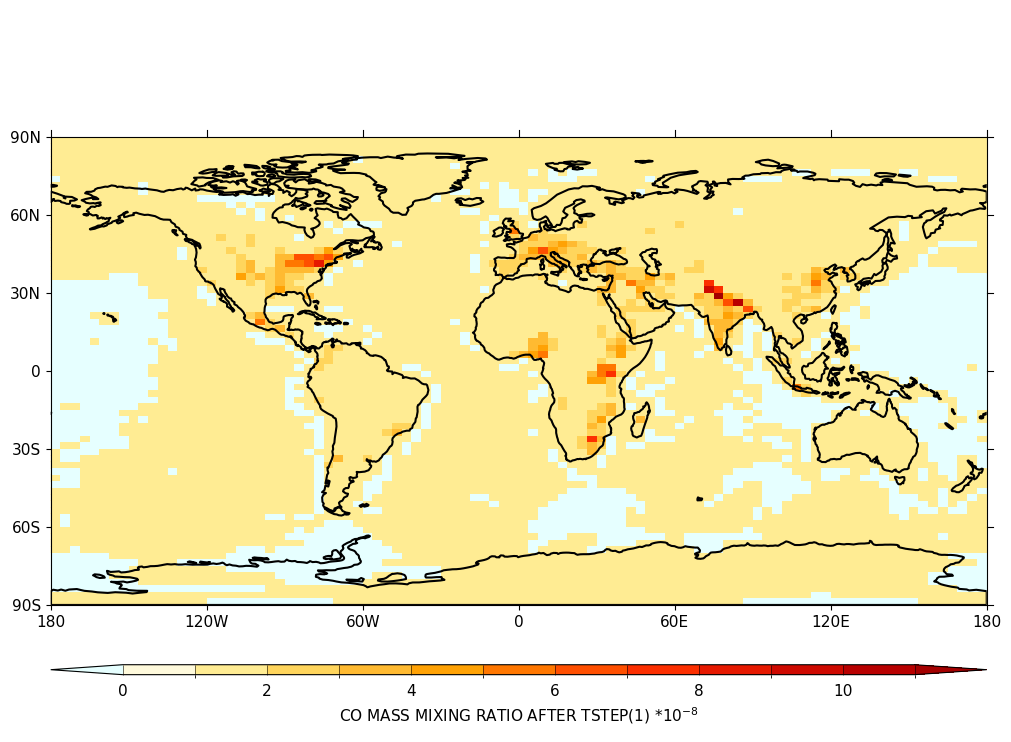

In [5]:
cfp.con(co_diff[0,:,:],blockfill_fast=True,lines=False)

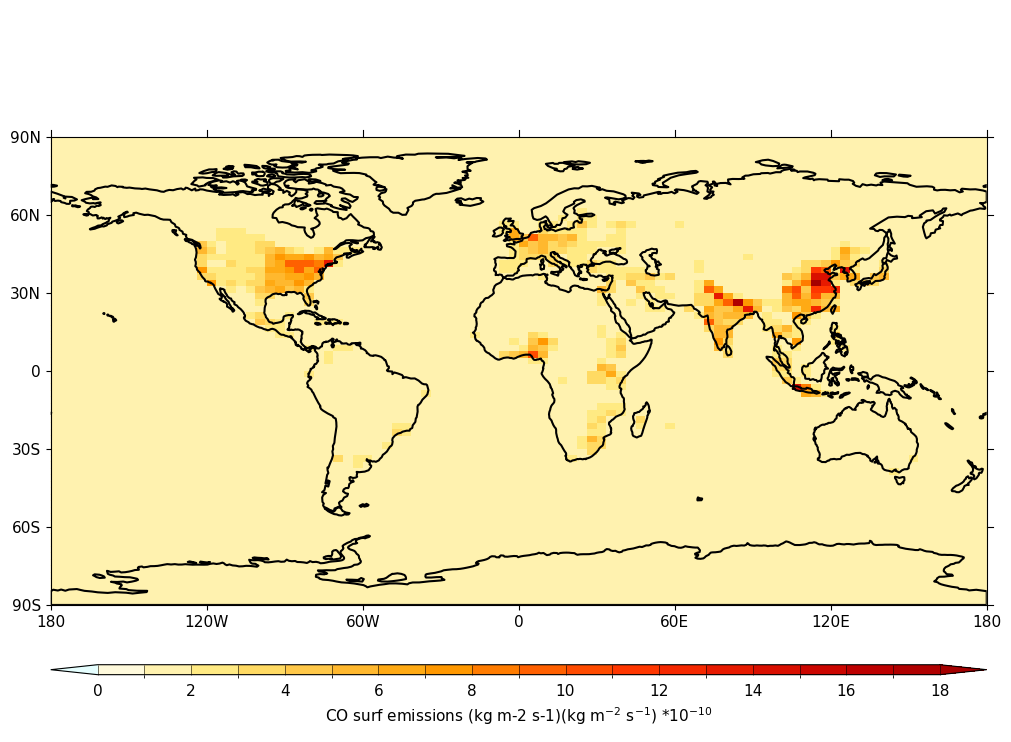

In [6]:
cfp.con(emico_diff[:,:],blockfill_fast=True,lines=False)

In [7]:
# output to netCDF
cf.write(co_diff,'/home/vagrant/cf_Task052_co.nc',fmt='NETCDF4')
cf.write(emico_diff,'/home/vagrant/cf_Task052_emico.nc',fmt='NETCDF4')